In [4]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt

In [15]:
# The Idea behind fuzzification is that the data becomes more human and less black and white or 1 or 0 so for my fuzzification 
# I have add decimals to the data this would show some tupe of range in between variables this would represent what the person 
# think a certain value might mean and gets a little more granular if the weather is cool there is obviously a level of cool 
# It could be almost mild. So it makes sense to add valuse in between. 

# hot = 3, mild = 2, cool = 1, weak = 1
# 2 = strong, long =2, short = 1, no = 0, yes = 1
fuzzdfcar = pd.DataFrame ({'Temp':[3.1,3.5,3.7,2.2,1.6,1.1,1.8,2.3,1.4,2.6,2.1,2.4,3.9,2.5],
                           'Wind':[1.4,2.7,1.1,1.2,1.7,2.5,2.9,1.1,1.4,1.5,2.3,2.6,1.1,2.2],
                           'TrafJ':[2.4,2.1,2.7,2.9,1.1,1.6,1.2,2.7,1.3,1.5,1.8,2.4,1.3,2.9],
                           'Drive':[0,0,1,1,1,0,1,0,1,1,1,1,1,0]})

t1 = fuzzdfcar[["Drive"]]
features = fuzzdfcar[['Temp','Wind','TrafJ']]
target = fuzzdfcar["Drive"]
fuzzdfcar

,Temp,Wind,TrafJ,Drive
0,3.1,1.4,2.4,0
1,3.5,2.7,2.1,0
2,3.7,1.1,2.7,1
3,2.2,1.2,2.9,1
4,1.6,1.7,1.1,1
5,1.1,2.5,1.6,0
6,1.8,2.9,1.2,1
7,2.3,1.1,2.7,0
8,1.4,1.4,1.3,1
9,2.6,1.5,1.5,1


In [24]:
# b) Choose the root node for the fuzzy decision tree and defend your choice.
# Again information gain is higherst with Traffic Jam by a pretty significant amount so I will be starting there. 

In [18]:
ftree = DecisionTreeClassifier(criterion = 'entropy').fit(features,target)

In [19]:
text_representation = tree.export_text(ftree)
print(text_representation)

|--- feature_2 <= 1.55
|   |--- class: 1
|--- feature_2 >  1.55
|   |--- feature_0 <= 3.60
|   |   |--- feature_0 <= 2.45
|   |   |   |--- feature_0 <= 1.60
|   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  1.60
|   |   |   |   |--- feature_1 <= 1.15
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_1 >  1.15
|   |   |   |   |   |--- class: 1
|   |   |--- feature_0 >  2.45
|   |   |   |--- class: 0
|   |--- feature_0 >  3.60
|   |   |--- class: 1



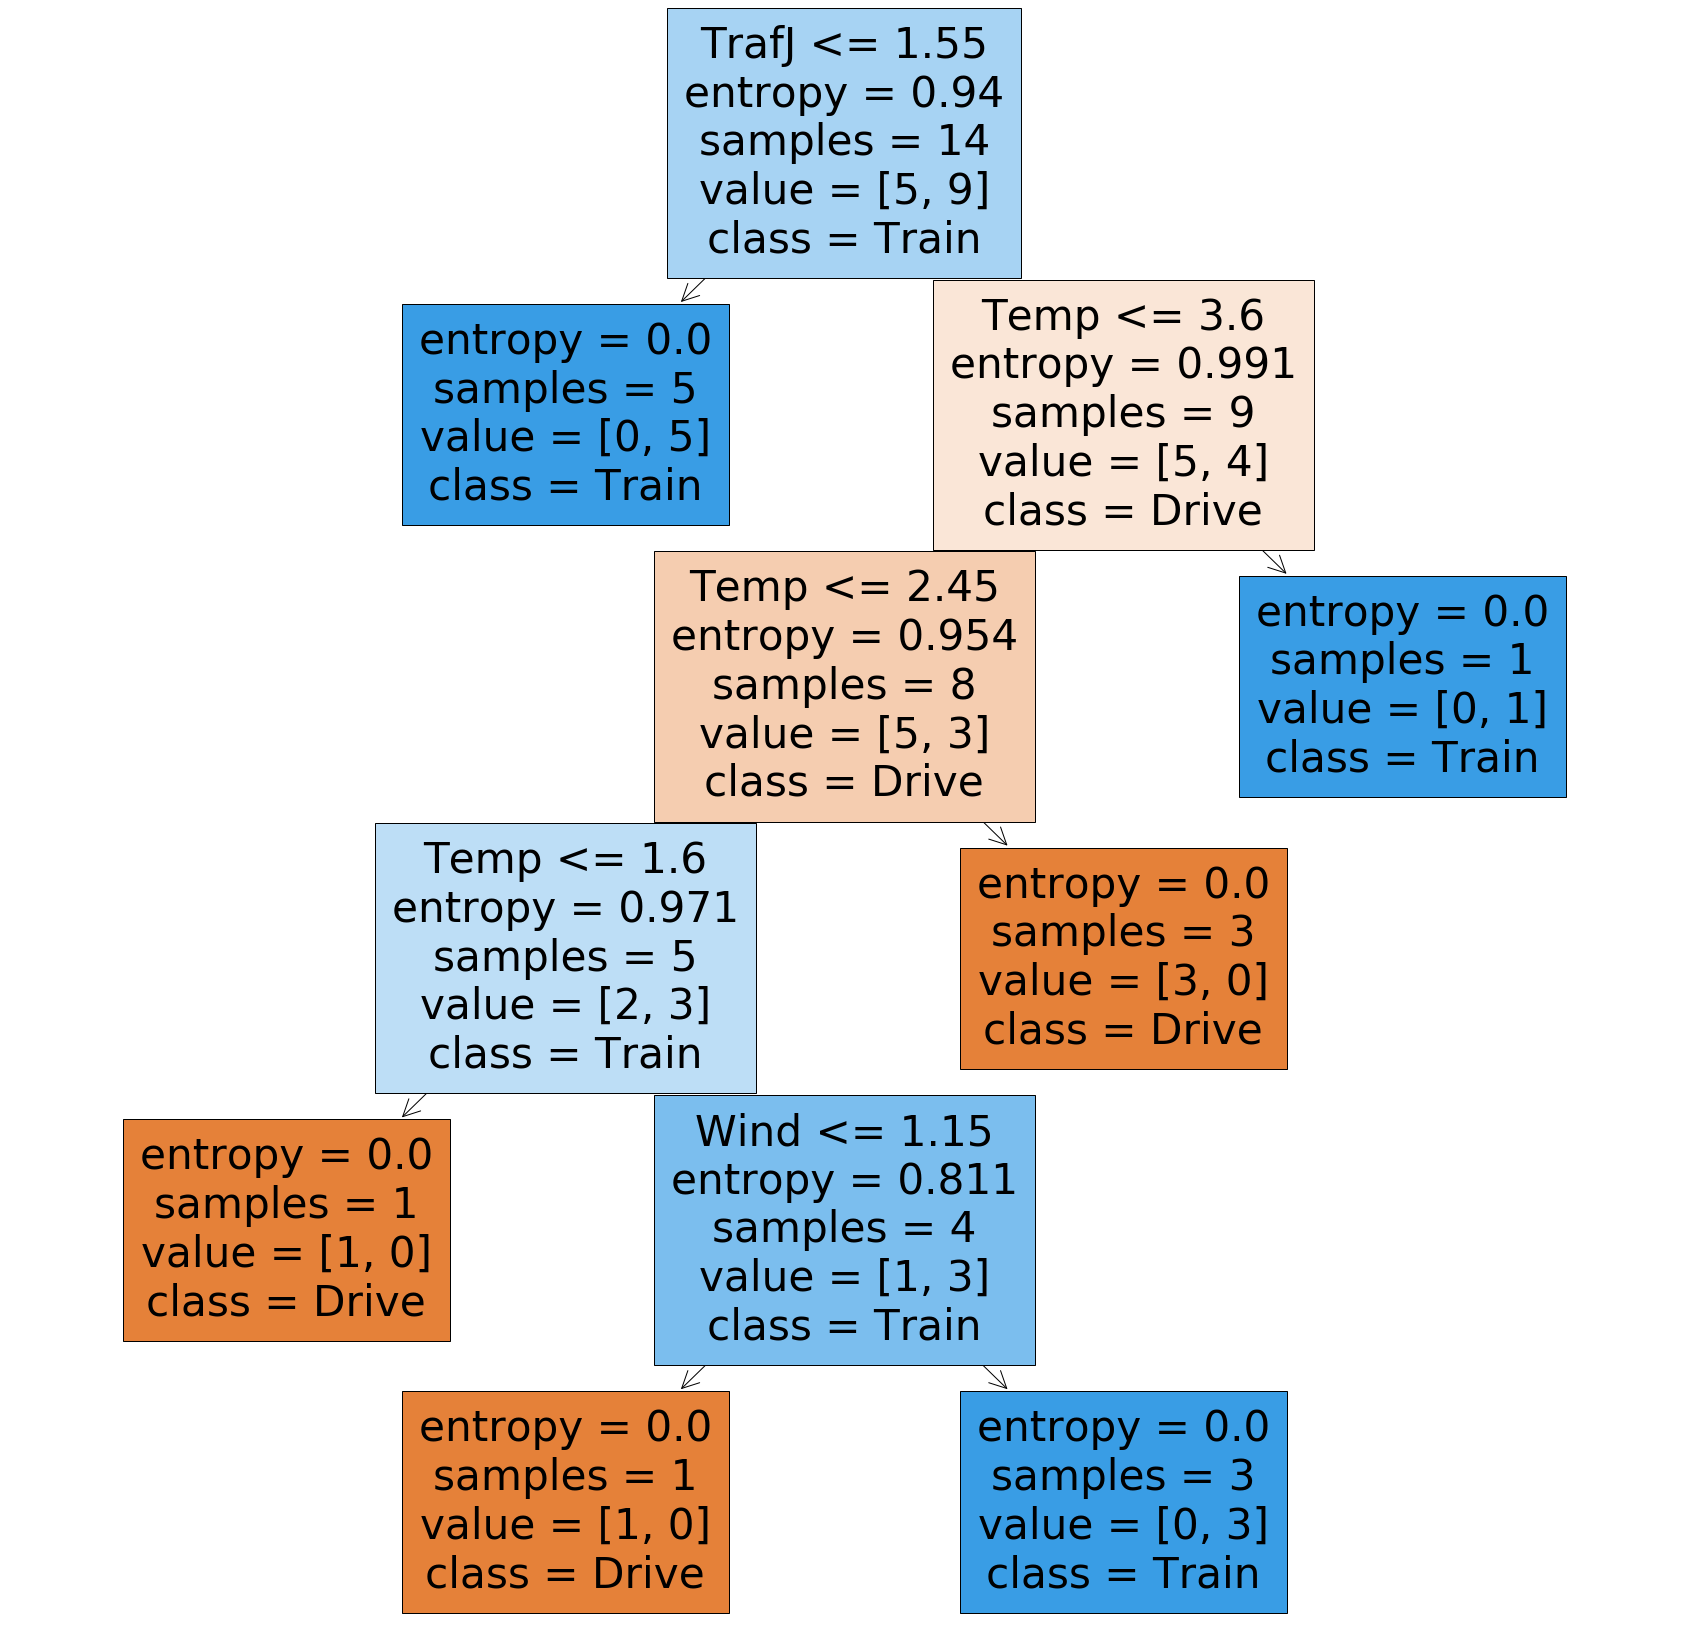

In [23]:
fig = plt.figure(figsize=(30,30))
_ = tree.plot_tree(ftree, feature_names = features.columns,
                   class_names= ("Drive","Train"),
                   filled=True)